In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.io import loadmat

In [2]:

# Define a function to process the data
def process_data(data, max_lab_length, max_seq_length, trainortest="test", need_pad=True):
    processed_data = []
    lexicon = set()
    unique_labels = set()
    for i in range(data.shape[0]):
        label = data[i, 0][0]
        # check if the element of label is all between 1 and 26
        if not all(1 <= x <= 26 for x in label):
            label = [x for x in label if 1 <= x <= 26]
            print(f"Label {i} is not all between 1 and 26, the label is: {data[i, 1]}, now changed to: {label}")

        sequence = data[i, 2]
        # skip if the sequence is empty
        # if sequence.shape[0] == 0:
        if sequence.shape[0] == 0:
            continue
        original_label_length = len(label)
        original_length = sequence.shape[0]
        if original_length > max_seq_length:
            print(f"Sequence {i} is longer than max length: {original_length}")
            break
        


        # Pad the sequence and label
        if need_pad:
            sequence = np.pad(sequence, ((0, max_seq_length - original_length), (0, 0)), 'constant', constant_values=0) 
            label = np.pad(label, (0, max_lab_length - len(label)), 'constant', constant_values=0)

        sequence = sequence.astype(np.float32)  # Convert sequence to float32

        # If training data, add augmented sequences
        if trainortest == "train":
            for j in range(3, data.shape[1]):
                augmented_sequence = data[i, j]
                if augmented_sequence.shape[0] == 0:
                    continue
                if need_pad:
                    augmented_sequence = np.pad(augmented_sequence, ((0, max_seq_length - augmented_sequence.shape[0]), (0, 0)), 'constant', constant_values=0)
                augmented_sequence = augmented_sequence.astype(np.float32)
                processed_data.append((label, augmented_sequence, original_label_length, augmented_sequence.shape[0]))
        else:
            processed_data.append((label, sequence, original_label_length, original_length))

        # Add words to lexicon
        word = data[i, 1][0]
        word = re.sub('[^a-zA-Z]', '', word).lower()
        lexicon.add(word)

        # Add labels to unique_labels
        unique_labels.add(tuple(label))

        


    return processed_data, unique_labels

In [3]:
def create_one_visualization(title, spec,x,y):
    pass

In [4]:
# all_data
mat = loadmat("../Develop/THU data/thu_word_fea_sorted" + "1_5" + ".mat")

data = mat[list(mat.keys())[-1]]

lizheyu_data = None
for idx in np.arange(data.shape[2]):
    # Extract the non-empty elements as the test set
    # print("user name", data[0][0][idx])
    user_name = str(data[0][0][idx])
    if "lizheyu" not in user_name:
        continue

    user_data = [elem for elem in data[2, :, idx] if elem.shape[0] != 1]

    train_data_raw = np.concatenate(user_data[:-1], axis=0)
    test_data_raw = user_data[-1]

    user_data = np.concatenate((train_data_raw, test_data_raw), axis=0)

    # Find the maximum sequence length in the data
    # fetch from the third column to last column
    max_seq_length = max(
        [sample.shape[0] for sample in user_data[:, 2:].reshape(-1)]
    )
    max_lab_length = max([sample[0].shape[0] for sample in user_data[:, 0]])

    print(max_seq_length)
    print(max_lab_length)

    # Process the data
    processed_train_data, train_lexicon = process_data(
        train_data_raw, max_lab_length, max_seq_length, trainortest="train"
    )  # need_pad=False
    lizheyu_data = processed_train_data
    
    

    
# get

66
6


In [5]:
def array_to_word(array):
    word = ""
    for elem in array:
        if elem == 0:
            continue
        word += chr(elem + 96)
    return word

In [6]:

label_count = {}

vis_data = {}
for i, (label, sequence, original_label_length,original_length) in enumerate(lizheyu_data):
    # print(array_to_word(label), original_length)
    lab_word = array_to_word(label)
    if lab_word not in label_count:
        label_count[lab_word] = 0
    label_count[lab_word] += 1
    if lab_word not in vis_data:
        vis_data[lab_word] = [sequence[:original_length]]
    else:
        vis_data[lab_word].append(sequence[:original_length])
print(label_count)


# pick 3 for each 

{'big': 60, 'busy': 60, 'ego': 60, 'enjoy': 60, 'enough': 60, 'every': 60, 'figure': 60, 'fog': 60, 'four': 60, 'give': 60, 'gives': 60, 'go': 60, 'goes': 60, 'going': 60, 'grow': 60, 'gun': 60, 'hi': 60, 'high': 60, 'higher': 60, 'hour': 60, 'hours': 60, 'how': 60, 'i': 60, 'if': 60, 'is': 60, 'mute': 60, 'my': 60, 'of': 60, 'off': 60, 'or': 60, 'our': 60, 'over': 60, 'rover': 60, 'swim': 60, 'tiktok': 60, 'time': 60, 'us': 60, 'user': 60, 'very': 60, 'volume': 60, 'why': 60, 'wifi': 60, 'wore': 60, 'worm': 60, 'worry': 60, 'wrong': 60, 'yes': 60, 'you': 60, 'young': 60, 'your': 60}


In [7]:
def delete_0s(array):
    return np.array([elem for elem in array if np.sum(elem) != 0])

(25, 200)
(28, 200)
(25, 200)
(22, 200)


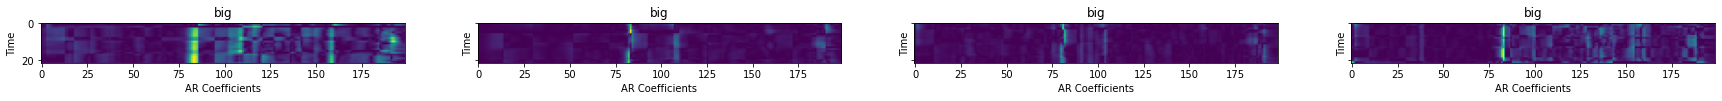

(48, 200)
(43, 200)
(43, 200)
(49, 200)


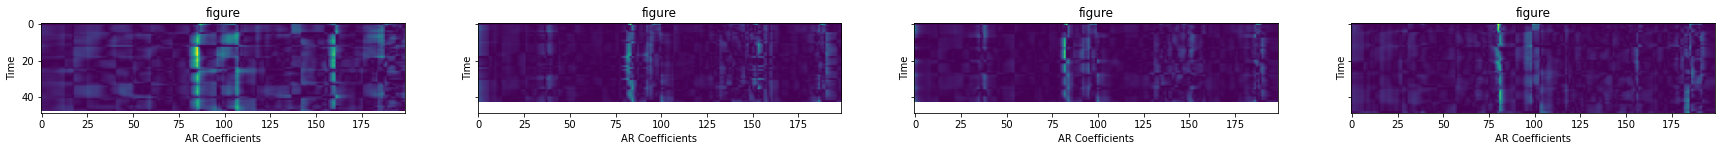

(29, 200)
(24, 200)
(33, 200)
(24, 200)


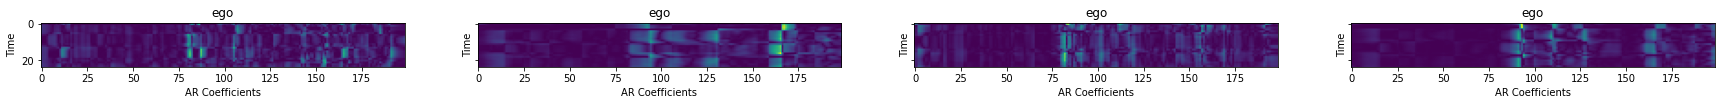

In [8]:
import random
import seaborn as sns
rows = 5
counter = 1
columns = 4
random.seed(3)
show_data = {}
# ar_show_data = show_data.copy()
for key in vis_data:
    
    show_data[key] = random.sample(vis_data[key], columns)
# plt.figure(figsize=(100, 50))


# select_keys = random.sample(list(show_data.keys()),rows)
select_keys =["big","figure","ego"]
for i, key in enumerate(select_keys):
    # rows = len(list(show_data.keys()))
    # print(show_data)
    
    
    # fig, axes = plt.subplots(len(list(show_data.keys())), 3)
    # Plot a line graph in the first subplot
    f, axs = plt.subplots(nrows=1, ncols=columns, figsize=(30,30),sharey=True)

    for j, spec in enumerate(show_data[key]):
        spec = delete_0s(spec)
        # axs[i,j].subplot(rows,3,counter)
        # print(spec[-1])
        
        axs[j].set_title(key)
        
        
        # split the spec into 3 parts
        # spec = spec.T
        # 
        # spec = spec[:spec.shape[0]//3*3]
        # spec = np.split(spec, 3)
        # spec = np.sum(spec, axis=0)
        # spec = spec.T
        
        # normalization
        # print(spec.shape)
        # spec = np.diff(spec, axis=0)
        # spec = (spec - np.mean(spec))/(np.max(spec)- np.min(spec))
        
        # norm2
        # spec = spec.T
        # norm_spec = np.zeros(spec.shape)
        # print(spec.shape)
        # for k in range(spec.shape[0]):
        #     norm_spec[k] = spec[k]-np.mean(spec[k])
        # spec = norm_spec
        
        
        # axs[j].imshow(spec)

        # spec = np.diff(spec, axis=0)
        print(spec.shape)
        
        # normallize spec to 0-1
        spec = spec.T
        new_spec = np.zeros(spec.shape)
        for k in range(spec.shape[0]):
            new_spec[k] = (spec[k] - np.min(spec[k]))/(np.max(spec[k]) - np.min(spec[k]))
        spec = new_spec
        spec = np.diff(spec, axis=0)
        # spec = (spec - np.min(spec))/(np.max(spec)- np.min(spec))
        spec = spec.T
        # sns.heatmap(np.abs(spec), ax=axs[j], cbar=False, cmap="viridis")
        axs[j].imshow(np.abs(spec))
        axs[j].set_ylabel("Time")
        axs[j].set_xlabel("AR Coefficients")
        
        
        counter += 1
        spec = spec.T
    plt.show()
        
    if counter > rows * columns:
        break
# plt.show()
ar_show_data = vis_data.copy()

In [9]:
import librosa
import os
import csv
from scipy import signal

In [10]:
def butter_filter(cutoff, fs, filter_direction, order=5):
    assert filter_direction == "low" or filter_direction == "high"
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff,
                         btype=filter_direction, analog=False)
    return b, a
def apply_butterworth_filter(data, cutoff, filter_direction, fs, order=5):
    b, a = butter_filter(cutoff, fs, filter_direction, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def get_timestamps(csv_path):
    output = []
    first = -1
    with open(csv_path) as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
            if first < 0:
                first = float(row[1])
            output.append([row[0], float(row[1])-first,float(row[2])-first])
    return output
def stft_col_to_time_domain_index(a_stft, stft_col, audio_shape):
    temp = stft_col/a_stft.shape[1]
    return int(audio_shape[0]*temp)
def get_stft_row_idx_from_freq_list(freq_list, target_freq):
    temp = np.arange(0, freq_list.shape[0])
    diffs = np.abs(np.add(freq_list, -target_freq))
    mask = np.argsort(diffs)
    return temp[mask[0]], freq_list[mask[0]]
def get_freq_start(target_bucket, audio_stft, sync_tone_start, sync_tone_end):
    sync_tone_start = int(sync_tone_start*audio_stft.shape[1])
    sync_tone_end = int(sync_tone_end*audio_stft.shape[1])
    row_of_interest = np.sum(audio_stft[target_bucket-1:target_bucket+1,sync_tone_start:sync_tone_end],axis=0)
    mask = np.where(row_of_interest>np.mean(row_of_interest)+np.std(row_of_interest))
    return mask[0][0]
def align_recordings(audio, audio_sr, sync_tone_freq = 5000, nfft = 2048, sync_tone_start = 1, sync_tone_end = 10):
    sync_tone_end = sync_tone_end/(audio.shape[0]/audio_sr)
    if sync_tone_start>0:
        sync_tone_start = sync_tone_start/(audio.shape[0]/audio_sr)
    a_stft = np.abs(librosa.stft(audio,n_fft = nfft, hop_length=int(nfft/16)))
    freqs = librosa.fft_frequencies(sr = audio_sr,n_fft = nfft)
    target_bucket, __  = get_stft_row_idx_from_freq_list(freqs, sync_tone_freq)
    start_col_index = get_freq_start(target_bucket, a_stft, sync_tone_start, sync_tone_end)
    time_domain_start = stft_col_to_time_domain_index(a_stft, start_col_index, audio.shape)
    return audio[int(sync_tone_start*audio.shape[0]) + time_domain_start:]

In [11]:
# gen stft figures

raw_data_path = r"..\Develop\THU data"

sr = 48000

In [19]:


user_data_dict = {}
for session_dir in os.listdir(os.path.join(raw_data_path)):
    if not "lizheyu" in session_dir:
        continue
    if not "word" in session_dir:
        continue
    csv_file= None
    wav_file = None
    print(session_dir)
    for file in os.listdir(os.path.join(raw_data_path, session_dir)):
        if file.endswith(".csv"):
            csv_file = os.path.join(raw_data_path, session_dir, file)
        if file.endswith(".wav"):
            # print(os.path.join(raw_data_path, session_dir, file))
            wav_file = os.path.join(raw_data_path, session_dir, file)
    y = librosa.load(wav_file, sr=sr)[0]
    y = align_recordings(y, sr, 2000)
    
    start_time_stamp = 0
    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[0] == "start":
                start_time_stamp = float(row[1])
                continue
            
            else:
                if row[0] not in user_data_dict:
                    user_data_dict[row[0]] = []
                user_data_dict[row[0]].append(y[int((float(row[1])-start_time_stamp)*sr):int((float(row[2])-start_time_stamp)*sr)])
                
    print(user_data_dict.keys())
            


lizheyu_office_40ms_23khz_word_left2
..\Develop\THU data\lizheyu_office_40ms_23khz_word_left2\lizheyu_office_word_left.wav
..\Develop\THU data\lizheyu_office_40ms_23khz_word_left2\lizheyu_office_word_left.wav
dict_keys(['ego', 'rover', 'high', 'worm', 'user', 'mute', 'wrong', 'give', 'my', 'swim', 'off', 'us', 'gun', 'four', 'is', 'big', 'wore', 'your', 'young', 'wifi', 'over', 'hour', 'enough', 'worry', 'go', 'gives', 'yes', 'grow', 'volume', 'figure', 'fog', 'how', 'hours', 'higher', 'every', 'why', 'enjoy', 'i', 'our', 'busy', 'if', 'going', 'very', 'or', 'goes', 'of', 'you', 'time', 'hi', 'tiktok', 'BLANK'])
lizheyu_silent_40ms_23khz_word_left2
..\Develop\THU data\lizheyu_silent_40ms_23khz_word_left2\lizheyu_silent_word_left.wav
..\Develop\THU data\lizheyu_silent_40ms_23khz_word_left2\lizheyu_silent_word_left.wav
dict_keys(['ego', 'rover', 'high', 'worm', 'user', 'mute', 'wrong', 'give', 'my', 'swim', 'off', 'us', 'gun', 'four', 'is', 'big', 'wore', 'your', 'young', 'wifi', 'over',

In [20]:
import seaborn as sns
def extract_reflected_features(rx, letter, frame = 2046, sr = 48000, hop_length_modifier = 22, plot_outputs = True, plot_vmax = .05, abs = True):
    if abs:
        sd_2 = np.abs(librosa.stft(rx, n_fft = frame, hop_length = frame//hop_length_modifier ,window=signal.windows.hann(frame), center=False))
    else:
        sd_2 = librosa.stft(rx, n_fft = frame, hop_length = frame//hop_length_modifier ,window=signal.windows.hann(frame), center=False)
    # plt.imshow(sd_2)
    # plt.show()
    # return
    plt_total = np.zeros((sd_2.shape))

    min_len = np.inf
    for i in range(hop_length_modifier):
        test = sd_2[:,i::hop_length_modifier]
        test_1 = np.diff(test,1,axis=1)
        r1 = test_1.shape[1]
        r2 = plt_total[:,i::hop_length_modifier].shape[1]
        if r1 < min_len:
            min_len = r1
        if r2 < min_len:
            min_len = r2

    for i in range(hop_length_modifier):
        test = sd_2[:,i::hop_length_modifier]
        test_1 = np.diff(test,1,axis=1)
        plt_total[:,i::hop_length_modifier][:,:min_len] = test_1[:,:min_len]

    if plot_outputs:
        fig,ax = plt.subplots(figsize = (10,5))
        ax.set_title(letter)
        sns.heatmap(np.flip(np.abs(plt_total)[650:,:],axis=0), ax=ax, cbar=False, cmap="viridis", vmax=plot_vmax)
        plt.show()
        plt.clf()

        #librosa.display.specshow(rx,ax=ax[1])
        # fig,ax = plt.subplots(figsize = (10,5))
        # sns.heatmap(np.flip(np.abs(plt_total)[:,:],axis=0), ax=ax, cbar=False, cmap="magma", vmax=plot_vmax)
        ax.set_title(letter)
        plt.show()
        plt.clf()
    return plt_total

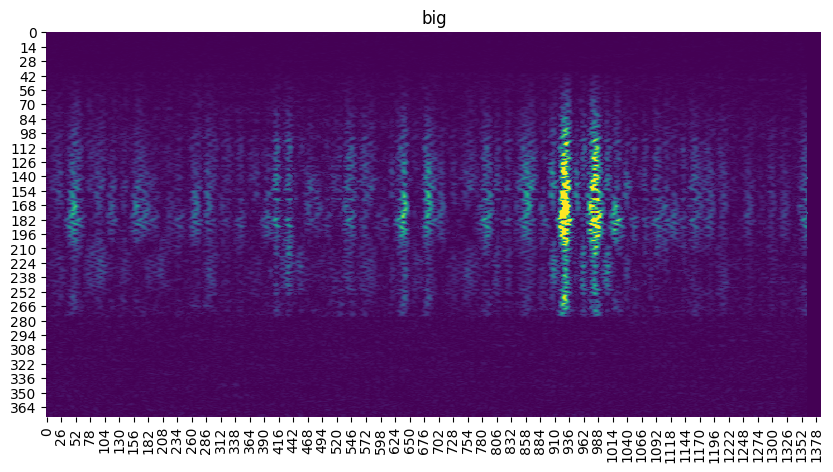

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [22]:
random.seed(3)
rows = 1
counter = 1
columns = 1

show_data = {}
plt.style.use('default')
for key in user_data_dict:
    
    show_data[key] = random.sample(user_data_dict[key], columns)
# plt.figure(figsize=(100, 50))


# select_keys = random.sample(list(show_data.keys()),rows)
select_keys = ["big", "figure","ego"]
for i, key in enumerate(select_keys):
    # rows = len(list(show_data.keys()))
    # print(show_data)
    # f, axs = plt.subplots(nrows=1, ncols=columns, figsize=(30,30),sharey=True)

    for j, y in enumerate(show_data[key]):
        
        
        extract_reflected_features(y, key, plot_outputs=True, plot_vmax = .05, abs = True)
        
        # n_fft = 2046  # Length of the FFT window
        # hop_length = 2046  # Hop size between consecutive frames
        # y = apply_butterworth_filter(y, 15000, "high", sr)

        # # Compute the STFT
        # stft = librosa.stft(y, n_fft=n_fft, hop_length = n_fft ,window=signal.windows.hann(n_fft), center=False)
        # stft = np.diff(stft, axis=1, n=2)
        # spectrogram = np.abs(stft)
        # a = 16000  # Lower frequency bound in Hz
        # b = 23000  # Upper frequency bound in Hz

        # # Convert the frequency bounds to bin indices
        # bin_a = int((a / sr) * n_fft)
        # bin_b = int((b / sr) * n_fft)
        
        # spec = spectrogram[bin_a:bin_b, :]
        # # spec = spec.T
        
        # axs[j].set_title(key)
        # # spec = spec.T
        # # spec = (spec - np.mean(spec))/(np.max(spec)- np.min(spec))
        # axs[j].imshow(spec)
        counter += 1
    # plt.show()
        
    if counter > rows * columns:
        break
stft_show_data = user_data_dict.copy()

[-27.95858303 -22.47408291 -16.98958279 -11.50508266  -6.02058254]
[-50.45468009 -43.95021763 -37.44575516 -30.94129269 -24.43683023]


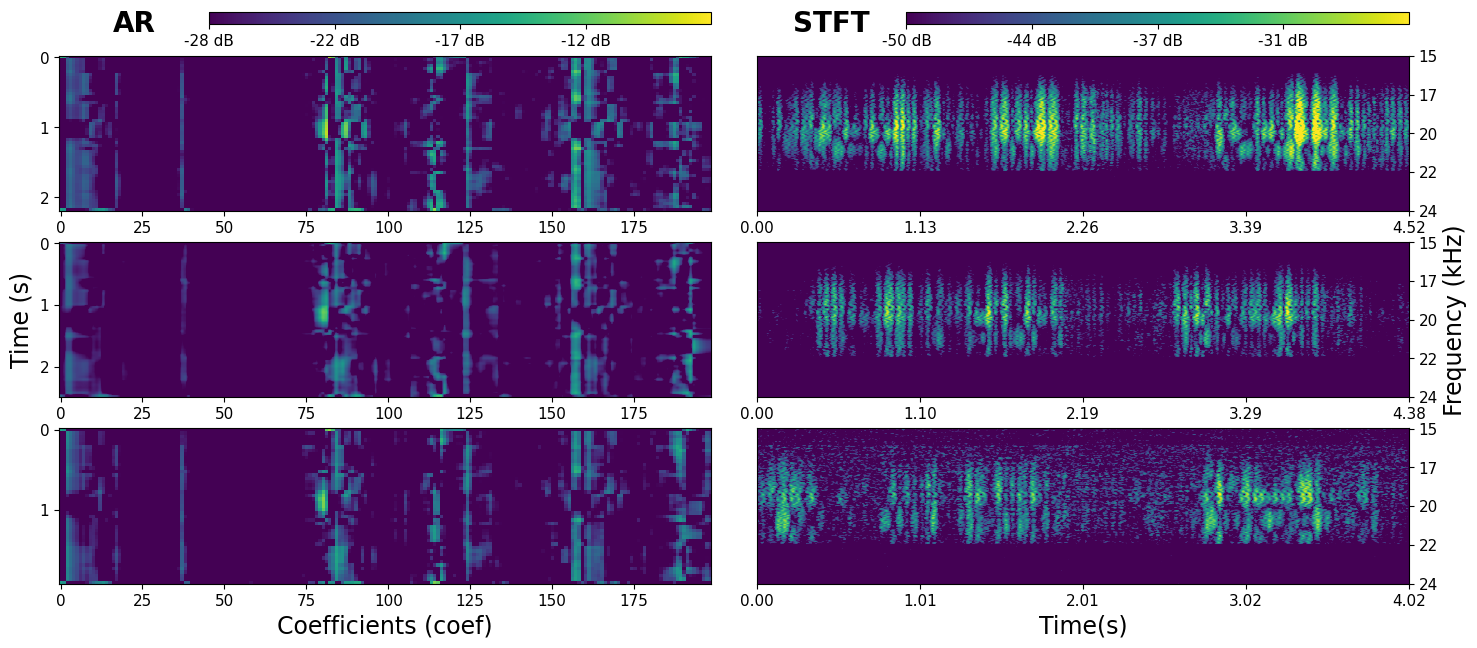

In [88]:
# get tow side plot\from mpl_toolkits.axes_grid1 import Divider, Size
from mpl_toolkits.axes_grid1 import Divider, Size
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import FuncFormatter, NullLocator



# select_keys = list(ar_show_data.keys())[:10]
select_keys = ["figure"]
total_words = len(select_keys)
counter = 1
num_for_each_word = 3
plt.style.use("default")

f, axs = plt.subplots(
    nrows=total_words * num_for_each_word,
    ncols=2,
    figsize=(15,7),

)

frame_size = 2046
sampling_rate = 48000
hop_length_modifier = 22
# Adjust the location and size of colorbar axes to match the width of the plot columns
# bottom
# cbar_ax1 = f.add_axes([0.05, 0.05, 0.436, 0.015])  # Adjust as necessary
# cbar_ax2 = f.add_axes([0.515, 0.05, 0.436, 0.015])  # Adjust as necessary
# top
# cbar_ax1 = f.add_axes([0.05, 0.82, 0.436, 0.015])  # New position for the top color bar
# cbar_ax2 = f.add_axes([0.515, 0.82, 0.436, 0.015])  # New position for the top color bar
# shorter colorbar
cbar_ax1 = f.add_axes([0.15, 0.82, 0.335, 0.015])  # New position for the top color bar
cbar_ax2 = f.add_axes([0.615, 0.82, 0.335, 0.015])  # New position for the top color bar

# Adjust the spacing of the subplots to accommodate the color bars at the top
# plt.subplots_adjust(top=0.2)  # Leave enough space at the top

# You may also need to adjust the overall size of the figure if necessary
f.set_size_inches(15, 8)  # You
# if title at bottom
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.12, top=0.78, wspace=0.07, hspace=0.2)
# if color bar at bottom
# plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.9, wspace=0.07, hspace=0.2)


# plt.tick_params(labelsize=20)

# axs[0, 0].yaxis.set_label_position("top")
# axs[0, 1].yaxis.set_label_position("top")

# axs[0,0].set_title("AR\n\n", fontsize = 17, fontweight='bold')
# axs[0,1].set_title("STFT\n\n", fontsize = 17, fontweight='bold')
f.text(0.10, 0.82, 'AR', va='center', ha='center', fontsize=20, fontweight='bold')
f.text(0.565, 0.82, 'STFT', va='center', ha='center', fontsize=20, fontweight='bold')


def dB_scale(x, pos):
    """Convert an amplitude scale to a dB scale for the colorbar."""
    return '{:+.0f} dB'.format(20 * np.log10(max(x, 1e-6)))

def convert_to_dB(spec):
    # Convert amplitude to dB - add a small number to avoid log(0)
    spec_db = 20 * np.log10(np.abs(spec) + 1e-6) 
    return spec_db

def dB_to_amplitude(spec_db):
    # Convert dB to amplitude
    spec_amplitude = 10 ** (spec_db / 20)
    return spec_amplitude

vran_ar = [4e-2,5e-1]
vran_stft = [3e-3,6e-2]

# ... (loop through data and plotting)

# Set the xlabel outside the loop for the bottom row plots
# Assuming the bottom row indexes for AR and reflection features are calculated as follows:
# print(axs.shape)
# bottom_ar_index = total_words * num_for_each_word - num_for_each_word
# axs[bottom_ar_index, 0].set_xlabel("AR Coefficients", fontsize=15,labelpad=-20)
# axs[bottom_ar_index, 1].set_xlabel("Time(s)", fontsize=15,labelpad=-20)

for i, key in enumerate(select_keys):
    for j in range(num_for_each_word):
        # plot ar features on the left side
        # print(key, len(ar_show_data[key]))
        spec = ar_show_data[key][j]

        spec = delete_0s(spec)
        # normallize spec to 0-1
        spec = spec.T
        new_spec = np.zeros(spec.shape)
        for k in range(spec.shape[0]):
            new_spec[k] = (spec[k] - np.min(spec[k])) / (
                np.max(spec[k]) - np.min(spec[k])
            )
        spec = new_spec
        spec = np.diff(spec, axis=0)
        spec = spec.T
        axs[i * (num_for_each_word) + j, 0].imshow(np.abs(spec))
        
        axs[i * (num_for_each_word) + j, 0].set_ylabel("Time (s)",fontsize=17)
        # axs[i * (num_for_each_word) + j, 0].set_xlabel("AR Coefficients", fontsize=15)
        # axs[i * (num_for_each_word) + j, 0].set_title('"'+key+'"')
        y = stft_show_data[key][j]
        y = extract_reflected_features(
            y, key, plot_outputs=False, plot_vmax=0.05, abs=True
        )

        axs[i * (num_for_each_word) + j, 1].set_ylabel("Frequency (kHz)", fontsize=17)
        # axs[i * (num_for_each_word) + j, 1].set_xlabel("Time(s)",fontsize=15)

        # spec[np.abs(spec) < 1e-6 ] = 1e-6

        im_ar = axs[i * (num_for_each_word) + j, 0].imshow(np.abs(spec), norm=LogNorm(vmin=vran_ar[0], vmax=vran_ar[1]))

        axs[i * (num_for_each_word) + j, 0].set_aspect('auto', adjustable='box')  # Set the aspect ratio
        divider = make_axes_locatable(axs[i * (num_for_each_word) + j, 0])
        # cax = divider.append_axes("right", size="5%", pad=0.05)
        # plt.colorbar(im_ar, cax=cax)

        # Plot Reflected features on the right side
        stft_spec = np.flip(np.abs(y)[650:, :], axis=0)
        # cut last 10 columns
        stft_spec = stft_spec[:, :-30]
        y = y[:, :-30]

        im_stft = axs[i * (num_for_each_word) + j, 1].imshow(stft_spec,norm=LogNorm(vmin=vran_stft[0], vmax=vran_stft[1]))
        axs[i * (num_for_each_word) + j, 1].set_aspect('auto', adjustable='box')  # Set the aspect ratio
        divider = make_axes_locatable(axs[i * (num_for_each_word) + j, 1])
        # cax = divider.append_axes("right", size="5%", pad=0.05)
        # plt.colorbar(im_stft, cax=cax)
        
        #
        # Adjusting y-axis labels for AR features
        frame_time = frame_size / sampling_rate  # Time duration per frame
        num_frames = spec.shape[0]
        y_labels = np.arange(0, num_frames * frame_time, frame_time)
        
        step = 5  # Adjust this to change the density of labels
        axs[i * (num_for_each_word) + j, 0].set_yticks(np.arange(0, num_frames, step))
        if j != num_for_each_word - 1:
            # axs[i * (num_for_each_word) + j, 0].set_xticks([])
            axs[i * (num_for_each_word) + j, 0].set_xlabel("")
            axs[i * (num_for_each_word) + j, 1].set_xlabel("")
        if j != 1:
            axs[i * (num_for_each_word) + j, 0].set_ylabel("")
            axs[i * (num_for_each_word) + j, 1].set_ylabel("")
        axs[i * (num_for_each_word) + j, 1].yaxis.tick_right()
        axs[i * (num_for_each_word) + j, 1].yaxis.set_label_position("right")
            
        axs[i * (num_for_each_word) + j, 0].set_yticklabels(["{:.2f}".format(t) for t in y_labels[::step]])
        
        # set y ticks
        fps = int(sampling_rate / frame_size)

        # Use only the frame numbers that correspond to whole seconds
        # This is assuming `num_frames` variable exists and corresponds to the total number of frames
        frame_ticks = np.arange(0, num_frames, fps)

        # Set the y-ticks to these frame numbers
        axs[i * (num_for_each_word) + j, 0].set_yticks(frame_ticks)

        # Now, generate labels for these ticks, which will be whole numbers (integers)
        frame_labels = np.arange(0, len(frame_ticks))

        # Set the y-tick labels to these integers
        axs[i * (num_for_each_word) + j, 0].set_yticklabels(frame_labels)

        # Adjusting x-axis limits for Reflected features (Time)

        
        # Time (x-axis)
        time_per_column = frame_size / sampling_rate / hop_length_modifier
        total_time = y.shape[1] * time_per_column
        time_labels = np.linspace(0, total_time, 5)
        axs[i * (num_for_each_word) + j, 1].set_xticks(np.linspace(0, y.shape[1], 5))
        axs[i * (num_for_each_word) + j, 1].set_xticklabels(["{:.2f}".format(t) for t in time_labels])
        
        freq_bins = np.fft.rfftfreq(frame_size, d=1./sampling_rate)  # Frequency bins based on FFT
        freq_start = 650  # Start of the frequency band you are showing
        displayed_freqs = freq_bins[freq_start:]
        num_y_ticks = 5  # Define the number of y-axis ticks
        y_tick_positions = np.linspace(0, len(displayed_freqs) - 1, num_y_ticks)
        y_tick_labels = ["{:.0f}".format(displayed_freqs[int(pos)]/1000) for pos in y_tick_positions]
        axs[i * (num_for_each_word) + j, 1].set_yticks(y_tick_positions)
        axs[i * (num_for_each_word) + j, 1].set_yticklabels(y_tick_labels)
        
        
        
        axs[i * (num_for_each_word) + j, 1].tick_params(axis='both', which='major', labelsize=11)
        axs[i * (num_for_each_word) + j, 0].tick_params(axis='both', which='major', labelsize=11)
        counter += 1

# change colorbar to db

cbar1 = f.colorbar(im_ar, cax=cbar_ax1, orientation='horizontal',format=FuncFormatter(dB_scale))
cbar2 = f.colorbar(im_stft, cax=cbar_ax2, orientation='horizontal',format=FuncFormatter(dB_scale))

num_ticks = 5
dB_tick_labels = np.linspace(convert_to_dB(vran_ar[0]), convert_to_dB(vran_ar[1]), num_ticks)
print(dB_tick_labels)
dB_tick_labels = dB_to_amplitude(dB_tick_labels)
cbar1.set_ticks(dB_tick_labels)
cbar1.set_ticklabels([dB_scale(val, None) for val in dB_tick_labels])

dB_tick_labels = np.linspace(convert_to_dB(vran_stft[0]), convert_to_dB(vran_stft[1]), num_ticks)
print(dB_tick_labels)
dB_tick_labels = dB_to_amplitude(dB_tick_labels)
cbar2.set_ticks(dB_tick_labels)
cbar2.set_ticklabels([dB_scale(val, None) for val in dB_tick_labels])

# cancel the minor ticks
cbar1.ax.xaxis.set_minor_locator(NullLocator())
cbar2.ax.xaxis.set_minor_locator(NullLocator())


# Set the font size of the colorbar's tick labels to match the others
cbar1.ax.tick_params(labelsize=11)  # Set the size as needed
cbar2.ax.tick_params(labelsize=11)  # Set the size as needed

# Set the labels for the colorbars
# if color bar at bottom
axs[2, 0].set_xlabel("Coefficients (coef)", fontsize = 17)
axs[2, 1].set_xlabel("Time(s)", fontsize = 17)
# title at bottom
# cbar1.set_label("Coefficients", fontsize = 17)
# cbar2.set_label("Time(s)", fontsize = 17)
# raise resolusion

plt.savefig("ar_stft.pdf", dpi = 200, bbox_inches="tight")
plt.show()
